# MEC3456 LAB 02
<sup> version 1.6-Q_final (from V1.3-A)</sup>

<span style="color:red">This lab should be completed **INDIVIDUALLY**. Collusion will result in a mark of zero. Collusion includes letting others copy your work and plagiarism is using code you did not write yourself without citing the source. Collaborating with others to discuss algorithms and details of Python syntax and structures is acceptable (indeed encouraged), however you **MUST** write your own code. All assignments will be checked using plagiarism-detecting software and similarities in submitted code will result in a human making a decision on whether the similarity constitutes plagiarism.</span>

<span style="color:red">Generative AI tools cannot be used in this assessment task. In this assessment, you must not use generative artificial intelligence (AI) to generate any materials or content concerning the assessment task.</span>


This lab is marked out of 23 and contributes 4% toward your total unit mark for the semester.

**You must provide pseudo code of your algorithm prior to the Jupyter cell which contains your code in a step-by-step format. You also must provide detailed comments of your code, including but not limited to which step in pseudo code corresponds to the python code.**

**Marks will be deducted for poor coding style, including but not limited to insufficient comments, poor naming of variables, etc. (loss of 5 marks if not met)**

Please enter your

**NameYifei Wang**

**Student ID:31125115**

## Submitting your assignment

Submit your assignment online using Moodle. Rename your jupyter notebook to `lab0[x]_[StudentID].ipynb` for example `lab01_20000000.ipynb`.

You should include all assignment answers and codes in this Jupyter Notebook and only submit this file. Only contents in this file will be marked.

Before submitting your assignment, restart the Python kernel and click the "Run all" button on the Jupyter notebook. **Make sure the outputs are as expected, and that there are no errors.** The TAs will run all cells in the Jupyter notebook prior to marking and only the newly generated outputs will be marked, not the outputs submitted with the notebook.

Code cells that do not run **will be marked as 0**, so please take extra care that everything runs correctly.

For handwritten sections, please upload a legible photo/scan of your work as an embedded image (links will not be accepted). Latex is also an acceptable answer format.

In [1]:
# Pre-assignment setup codes. Don't modify this code.
import numpy as np
import matplotlib.pyplot as plt

def sin2D(x, y):
    # Function with sine waves
    return  np.sin(x*1.5*np.pi)*np.sin(y*1.5*np.pi)*2

def generate_spline_data(StudentID):

    from scipy.special import erf
    np.random.seed(StudentID)
    interval = 0.5
    x = np.arange(-3,3,interval)
    x = x +np.random.rand(x.size)*interval/2
    y = erf(x)

    #rotate x and y by 30 degrees

    theta = np.pi/6
    x_1 = x*np.cos(theta) - y*np.sin(theta)
    y_1 = x*np.sin(theta) + y*np.cos(theta)
    x = x_1
    y = y_1
    return x,y

def create_2d_spline_data(studentID):
    np.random.seed(studentID)
    # spacing = 0.06
    # x_linear = np.arange(-0.75,0.75,spacing)
    # y_linear = np.arange(-0.75,0.75,spacing)

    x_linear = np.linspace(-1,1,25)
    y_linear = np.linspace(-1,1,25)

    dx = x_linear[1]-x_linear[0]
    dy = y_linear[1]-y_linear[0]

    x_linear[1:-1] = x_linear[1:-1] + (np.random.rand(x_linear.size-2)-0.5)*dx/2
    y_linear[1:-1] = y_linear[1:-1] + (np.random.rand(y_linear.size-2)-0.5)*dy/2

    xx, yy = np.meshgrid(x_linear, y_linear)
    f = sin2D(xx, yy)

    return x_linear,y_linear,f

def q3_analytical_solution(xx,yy):
    return sin2D(xx,yy)

# Question 1 [6 marks]
Consider the following set of data points

| index | 0 | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $x$ | 1.4 | 2.2 | 3.7 | 4.3 | 5.1 | 6.8 | 7.4 | 8.3 | 9.1 | 10.0|
| $y$ | 2.5 | 3.8 | 5.7 | 10.2| 15.2| 16.0| 13.2| 10.4| 2.1 | -1.5|

### Q1a [3 marks]


Use a third order Lagrange polynomial interpolation to find the $y$ value when $x=5$ by hand. State the indices of the data points you will use before working, and explain why you use these particular data points.

**Copy and paste the image containing the answer to this cell to embed it.**


### Q1b [3 marks]

Repeat Q1a but use the Newton’s divided difference method by hand. Compare and comment the results you obtained from Q1a and Q1b.

**Copy and paste the image containing the answer to this cell to embed it.**

# Question 2 [10 marks]

## Q2a [3 marks]
Consider the following set of data points

| index | 0 | 1   | 2   | 3   | 4 |
|-----|-----|-----|-----|-----|---|
| $x$ | 1.2 | 2.1 | 3.4 | 4.6 | 5.1 |
| $y$ | 0.3 | 6.7 | -5.2 | 4.2| 6.3|

To construct a cubic spline for this set of data using natural boundary conditions, first state the number of spline functions and the number of unknowns for the spline, then construct the system matrix you need to solve for $c_i$ by hand. You don't need to solve for values of $c_i$.

**Copy and paste the image containing the answer to this cell to embed it.**


## Q2b [2 marks]
Write a Python function to calculate the cubic spline coefficients from an input of an arbitrary length with clamped boundary conditions. Implement a check and raise Value errors if the inputs have inadequate lengths. (use `raise ValueError('error message')`)

The outputs should be four one-dimensional numpy arrays of the size equal to the number of spline segments, each representing one spline coefficient $(a_i, b_i, c_i, d_i)$ for each segment of the spline $f_i(x)$. Each cubic spline is defined by:

$$f_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$$

**Provide the pseudo code for your algorithm before writing the code.**

In [2]:
def SplineCoeff(x, y, deriv):
    '''
    This function computes the coefficients of the cubic spline interpolant.
    input:
    x (numpy array) : x-coordinates of the data points
    y (numpy array) : y-coordinates of the data points
    deriv (numpy array) : derivative values at the ends of the data points
    output:
    a (numpy array) : coefficients of the spline coefficients
    b (numpy array) : coefficients of the spline coefficients
    c (numpy array) : coefficients of the spline coefficients
    d (numpy array) : coefficients of the spline coefficients
    '''
    # Write your code here
    
    if len(x) != len(y):
        raise ValueError("input vectors must have the same length")
    if len(deriv) != 2:
        raise ValueError("two derivatives are needed")
    if len(x) <= 3:
        raise ValueError("no enough points provided")

    n = len(x)
    A = np.zeros((n, n))
    B = np.zeros(n)

    h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]

    A[0, 0] = 2 * h[0]
    A[0, 1] = h[0]
    A[n-1, n-2] = h[n-2]
    A[n-1, n-1] = 2 * h[n-2]

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]

    s1 = deriv[0]
    sn = deriv[1]

    B[0] = 3 * ((y[1] - y[0]) / h[0] - s1)
    B[n-1] = 3 * (sn - (y[n-1] - y[n - 2]) / h[n-2])
    for i in range(1, n-1):
        B[i] = 3 * (y[i+1] - y[i]) / h[i] - 3 * (y[i] - y[i-1]) / h[i-1]
        
    c = np.linalg.solve(A, B)
    
    a = np.zeros(n-1)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    
    for i in range(n-1):
        a[i] = y[i]
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
    
    return a, b, c, d
    

# # Use the following code to verify the completed interpolation function
# # The x and y here can be modified by yourself, but must ensure that x is increasing
# # x = np.array([0, 1, 2, 3], dtype=np.float64)
# # y = np.array([0, 1, 0, 1], dtype=np.float64)
# 
# # a, b, c, d = SplineCoeff(x, y, np.array([1, 1], dtype=np.float64))
# 
# StudentID = np.random.randint(0, 100000) + 31125115  #Change this to your student ID
# x, y = generate_spline_data(StudentID)
# #Write your code here
# deriv = [np.sqrt(3) / 3, np.sqrt(3) / 3]
# 
# a, b, c, d = SplineCoeff(x, y, deriv)
# 
# from matplotlib import pyplot as plt
# 
# # This part is drawn using a function written by myself
# for i in range(len(x)-1):
#     X = np.linspace(x[i], x[i+1], 100)
#     Y = a[i] + b[i] * (X - x[i]) + c[i] * (X - x[i])**2 + d[i] * (X - x[i])**3
#     plt.plot(X, Y, label=f'Segment {i+1}')
# 
# # This part is drawn using scipy's CubicSpline function.
# from scipy.interpolate import CubicSpline
# X = np.linspace(x[0], x[-1], 100)
# cs = CubicSpline(x, y, bc_type=((1, 1), (1, 1)))
# plt.plot(X, cs(X), label='Cubic Spline')
# 
# # If the interpolation method is implemented correctly, the two images should be coincident.
# plt.scatter(x, y)
# plt.legend()
# plt.show()

## Q2c [2 marks]
Write a Python function that calculates the interpolated y-values specified from the cubic splines for an array of input x values. You can assume that the input values are in ascending order and within the range of `xi`.


**Provide the pseudo code for your algorithm before writing the code.**

In [3]:

def SplineCalc(a,b,c,d,xi,xp):
    '''
    This function evaluates the spline interpolant at the points in xp.
    input:
    a (numpy array) : coefficients of the spline coefficients
    b (numpy array) : coefficients of the spline coefficients
    c (numpy array) : coefficients of the spline coefficients
    d (numpy array) : coefficients of the spline coefficients
    xi (numpy array) : x-coordinates of the data points
    xp (numpy array) : x-coordinates of the points to be evaluated
    output:
    yp (numpy array) : interpolated y-coordinates
    '''
    #Write your code here
    xi_len = len(xi)
    xp_len = len(xp)
    yp = np.zeros_like(xp)
    #xp
    for i in range(xp_len):
        # xi
        x = xp[i]
        for j in range(xi_len - 1):
            if xi[j] <= x < xi[j + 1]:
                yp[i] = a[j] + b[j] * (x - xi[j]) + c[j] * (x - xi[j]) ** 2 + d[j] * (x - xi[j]) ** 3
        
        tmp = xi_len - 2
        if x == xi[-1]:
            yp[i] = a[tmp] + b[tmp] * (x - xi[-1]) + c[tmp] * (x - xi[-1]) ** 2 + d[tmp] * (x - xi[-1]) ** 3
        
    return yp


## Q2d [1 marks]
Using the functions you have written in Q2b and Q2c, interpolate the supplied profile with an interval of 0.01. Make the gradient equal to $\sqrt{3}/3$ at both ends of the interpolated data.

Plot the supplied data as crosses and the interpolated data as a line on the same graph. Comment on your solution.

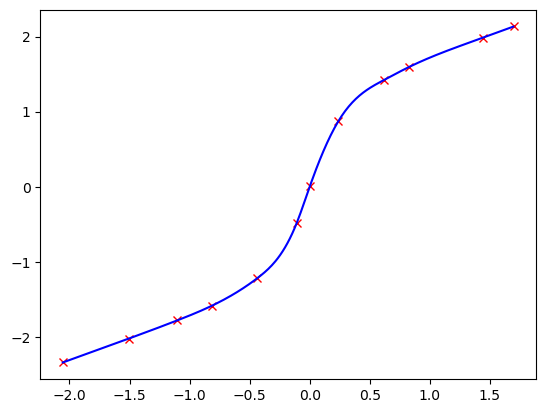

In [4]:
StudentID = np.random.randint(0,100000)+31125115 #Change this to your student ID
x,y = generate_spline_data(StudentID)
#Write your code here
deriv = [np.sqrt(3) / 3, np.sqrt(3) / 3]
a, b, c, d = SplineCoeff(x, y, deriv)

xp = np.arange(x[0], x[-1], 0.01)
yp = SplineCalc(a, b, c, d, x, xp)

# # This part is drawn using scipy's CubicSpline function.
# from scipy.interpolate import CubicSpline
# X = np.linspace(x[0], x[-1], 100)
# cs = CubicSpline(x, y, bc_type=((1, deriv[0]), (1, deriv[1])))
# plt.plot(X, cs(X), 'r--', label='Cubic Spline')

plt.plot(x, y, 'rx')
plt.plot(xp, yp, 'b-')
plt.show()

## Q2e [2 marks]
Redo Q2d using a gradient of `10` at both ends. What differences and similarities do you notice between the two fitted lines? Judging from the two fitted lines, which one yields a better fit and why?

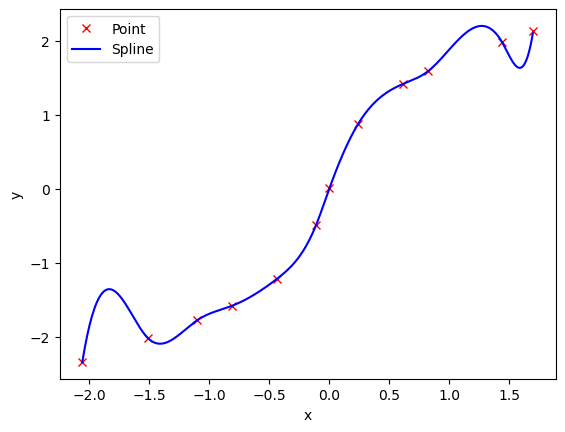

In [5]:
#Write your code here
deriv = [10, 10]
a, b, c, d = SplineCoeff(x, y, deriv)

yp = SplineCalc(a, b, c, d, x, xp)

plt.plot(x, y, 'rx', label="Point")
plt.plot(xp, yp, 'b-', label="Spline")

# # This part is drawn using scipy's CubicSpline function.
# from scipy.interpolate import CubicSpline
# X = np.linspace(x[0], x[-1], 100)
# cs = CubicSpline(x, y, bc_type=((1, deriv[0]), (1, deriv[1])))
# plt.plot(X, cs(X), 'r--', label='Cubic Spline')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Write your answer here**

# Question 3 [7 Marks]

In this question, we will investigate interpolation from structured two-dimensional datasets.

## Q3a [1 mark]

By hand, interpolate the value at (0.3,0.7) using the bilinear interpolation method, given the following dataset:

| x | y | f |
|---|---|---|
| 0 | 0 | -1.2 |
| 0 | 1 | -0.3 |
| 1 | 0 | 1.1 |
| 1 | 1 | 0.4 |

**Copy and paste the image containing the answer to this cell to embed it.**


## Q3b [2 marks]
Using the spline interpolation functions you have written for Question 2, write a function that does the interpolation in one dimension, then write another function to perform two-dimensional spline interpolation.


**Provide the pseudo code for your algorithm before writing the code.**

In [6]:
def splineInterpolation(xi,yi,deriv,xp):
  '''
  This function interpolates the data points using cubic spline interpolation.
  input:
  xi (numpy array) : x-coordinates of the data points
  yi (numpy array) : y-coordinates of the data points
  deriv (numpy array) : derivative values at the ends of the data points
  xp (numpy array) : x-coordinates of the points to be evaluated

  output:
  yp (numpy array) : interpolated y-coordinates
  '''

  #Write your code here
  a, b, c, d = SplineCoeff(xi, yi, deriv)
  yp = SplineCalc(a, b, c, d, xi, xp)
  return yp

def splineInterpolation2D(x_i_linear,y_i_linear,f_i,deriv,x_p_linear,y_p_linear):
  '''
  This function interpolates the data points using cubic spline interpolation in a structured two dimensional grid.
  input:
  x_i_linear (numpy array) : x-coordinates of the data points
  y_i_linear (numpy array) : y-coordinates of the data points
  f_i (numpy array) : function values at the data points
  deriv (numpy array) : derivative values at the ends of the data points
  x_p_linear (numpy array) : x-coordinates of the points to be evaluated
  y_p_linear (numpy array) : y-coordinates of the points to be evaluated

  output:
  f_p (numpy array) : interpolated function values
  '''
  #Write your code here
  
  f_py = np.zeros((len(y_i_linear), len(x_p_linear)))
  for i in range(len(y_i_linear)):
      f_py[i, :] = splineInterpolation(x_i_linear, f_i[i, :], deriv, x_p_linear)
  
  f_p = np.zeros((len(y_p_linear), len(x_p_linear)))
  for j in range(len(x_p_linear)):
      f_p[:, j] = splineInterpolation(y_i_linear, f_py[:, j], deriv, y_p_linear)
  
  return f_p


## Q3c [2 marks]

Use the function from Q3b to interpolate the supplied data to another regular grid from -1 to 1 with 50 equally spaced points in both the x- and y- directions. Use clamped boundary conditions with zero derivatives on the boundaries.

Plot the supplied data as a scatter plot with the face color representing the value, black edges and adequate size. Overlay the scatter plot over a filled contour plot of interpolated data, which uses the same color map and color scale. Complete the plot with a colorbar, figure title and axis titles. All these functionalities can be achieved by using appropriate functions from `matplotlib.pyplot` or in shorthand, `plt`.


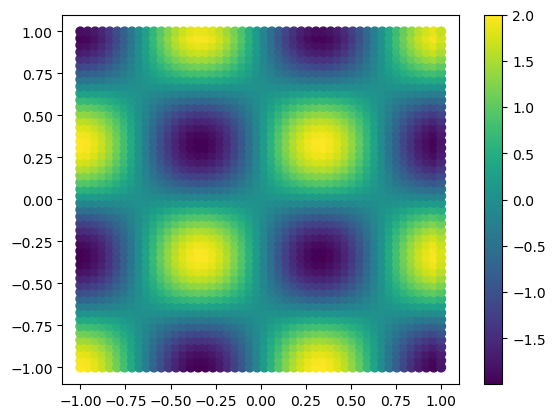

In [7]:
StudentID = 31125115
x_i_linear,y_i_linear,f_i = create_2d_spline_data(StudentID)

# Your answer to question Q3c goes here
x_p_linear = np.linspace(-1, 1, 50)
y_p_linear = np.linspace(-1, 1, 50)
deriv = np.array([0, 0])
f_p = splineInterpolation2D(x_i_linear, y_i_linear, f_i, deriv, x_p_linear, y_p_linear)

xx_p, yy_p = np.meshgrid(x_p_linear, y_p_linear)
plt.scatter(xx_p, yy_p, c=f_p, s=40)
plt.colorbar()
plt.show()

## Q3d [2 marks]

Plot the squared error between the analytical function and the interpolated points from the previous question as a filled contour plot. In addition, calculate the mean squared error (MSE), which is defined as $\frac{1}{n}\sum_{i=0}^{n}(\tilde{y_i} - y_i)^2$, where $\tilde{y}$ is the analytical value and $y$ is the interpolated value. Print the MSE with an appropriate message. Analyse the contour plot of the error, and explain why the error peaks at certain locations.

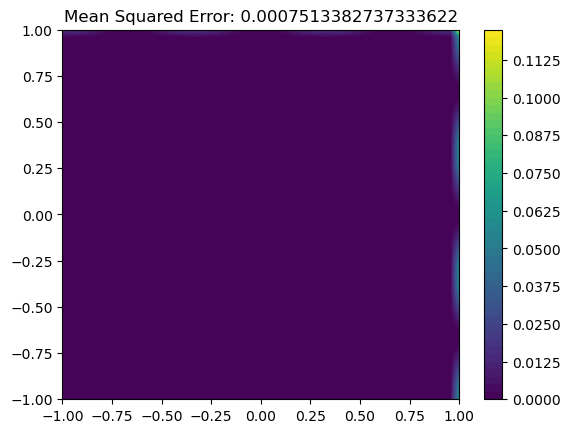

In [8]:
f_analytical = q3_analytical_solution(xx_p, yy_p) #xx_p and yy_p are the 2d meshgrid.

# Your answer to question Q3d goes here
mse = np.mean((f_p - f_analytical) ** 2)

plt.contourf(xx_p, yy_p, (f_p - f_analytical) ** 2, 50)
plt.colorbar()
plt.title(f'Mean Squared Error: {mse}')
plt.show()



**Enter your analysis and explaination here**